In [2]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

from astropy.io import fits

KeyboardInterrupt: 

/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

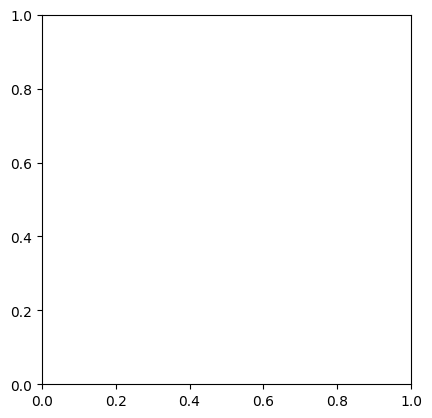

In [4]:
response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Identification_Area.pds:product_class eq "Product_Observational") and (ops:Harvest_Info.ops:node_name eq "PDS_GEO") and (pds:Array_2D_Image.pds:axes eq "2") and (pds:Primary_Result_Summary.pds:processing_level eq "Derived") )&start=0&limit=3000')

#pds:Array_2DImage.pds:axes eq "2"
#pds:Data_Processing_Level - specify not raw


#(pds:Science_Facets.pds:wavelength_range eq "Visible")

# response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Science_Facets.pds:wavelength_range eq "Visible") and not (ops:Harvest_Info.ops:node_name eq "PDS_SBN"))&start=0&limit=3000')

resp_data = response.json()['data']


counter = -1
urls = []
for prod in resp_data:
    urls.append([prod['properties']['ops:Data_File_Info.ops:file_ref'][0]])
    # if '.fits' in prod['properties']['ops:Data_File_Info.ops:file_ref'][0]:
    #     urls.append([prod['properties']['ops:Data_File_Info.ops:file_ref'][0]])

print('debug')


In [6]:
# import

def display_image_from_url(url):
    response = requests.get(url)
    response.raise_for_status()
    if "img" in url:
       data = response.content()
    else:
        hdu_list = fits.open(BytesIO(response.content))
        data = hdu_list[0].data

    plt.imshow(data, origin='lower')
    plt.colorbar()
    plt.title("Image")
    plt.show()

    # hdu_list.close()

ind = 2800
display_image_from_url(urls[0][0])
# print(urls[ind])

#https://pds.nasa.gov/api/search/1/products/urn:nasa:pds:orex.gbo.ast-bennu.lightcurves-images:data::1.0/members
#"https://sbnarchive.psi.edu/pds4/non_mission/orex.gbo.ast-bennu.lightcurves-images_V1_0/data/images/5sep14_101955bennu_w_0214.fit"
print('debug')

In [9]:
len(urls)

2894

In [ ]:
import os
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename


if not os.access('.spice_kernels',os.F_OK):
        os.mkdir('.img')

    kernel_dir = os.path.join(".img")
    os.makedirs(kernel_dir, exist_ok=True)

    file_path = os.path.join(kernel_dir, os.path.basename(url))
    open(file_path, "wb").write(response.content)
    r = requests.get(url, allow_redirects=True)

        plt.style.use(astropy_mpl_style)
    image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

    # hdul = fits.open(io.BytesIO(response.content))

    img_data = fits.getdata(image_file, ext = 0)

    # data = hdul[0].data
    plt.figure()
    plt.imshow(data, cmap='gray', origin='lower')
    plt.colorbar()
    plt.show()
